In [43]:
import json
import sys 
sys.path.append('/root/circuit-finder')
from circuit_finder.patching.eap_graph import EAPGraph
from circuit_finder.constants import ProjectDir
from circuit_finder.plotting import show_attrib_graph

results_dir = ProjectDir / "results/leap_experiment"

# Print Hparams

In [44]:

config = json.load(open(results_dir / "config.json"))
for key, value in config.items():
    print(f"{key}: {value}")

dataset_path: datasets/ioi/ioi_vanilla_template_prompts.json
save_dir: results/leap_experiment
seed: 1
batch_size: 4
total_dataset_size: 1024
ablate_errors: False
first_ablate_layer: 2
verbose: False


# Show Dataset

In [45]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

dataset = results_dir / "dataset.json"
with open(dataset, 'r') as f:
    dataset = json.load(f)

df = pd.DataFrame(dataset)
df.head()

,clean,answer,wrong_answer,corrupt
0,"<|endoftext|>When Ruby and Charlie went to the house, Charlie gave a snack to",Ruby,Charlie,"<|endoftext|>When Eva and Anna went to the house, Connor gave a snack to"
1,"<|endoftext|>When Thomas and Arthur went to the hospital, Arthur gave a basketball to",Thomas,Arthur,"<|endoftext|>When Dean and Crew went to the hospital, Frank gave a basketball to"
2,"<|endoftext|>When Robert and Crystal went to the house, Crystal gave a bone to",Robert,Crystal,"<|endoftext|>When Frank and Russell went to the house, Simon gave a bone to"
3,"<|endoftext|>When Blake and Jane went to the restaurant, Jane gave a kiss to",Blake,Jane,"<|endoftext|>When Emily and Sean went to the restaurant, Jennifer gave a kiss to"


# Plot Graph

Threshold: 0.001, n_edges: 238
Threshold: 0.003, n_edges: 70
Threshold: 0.01, n_edges: 32


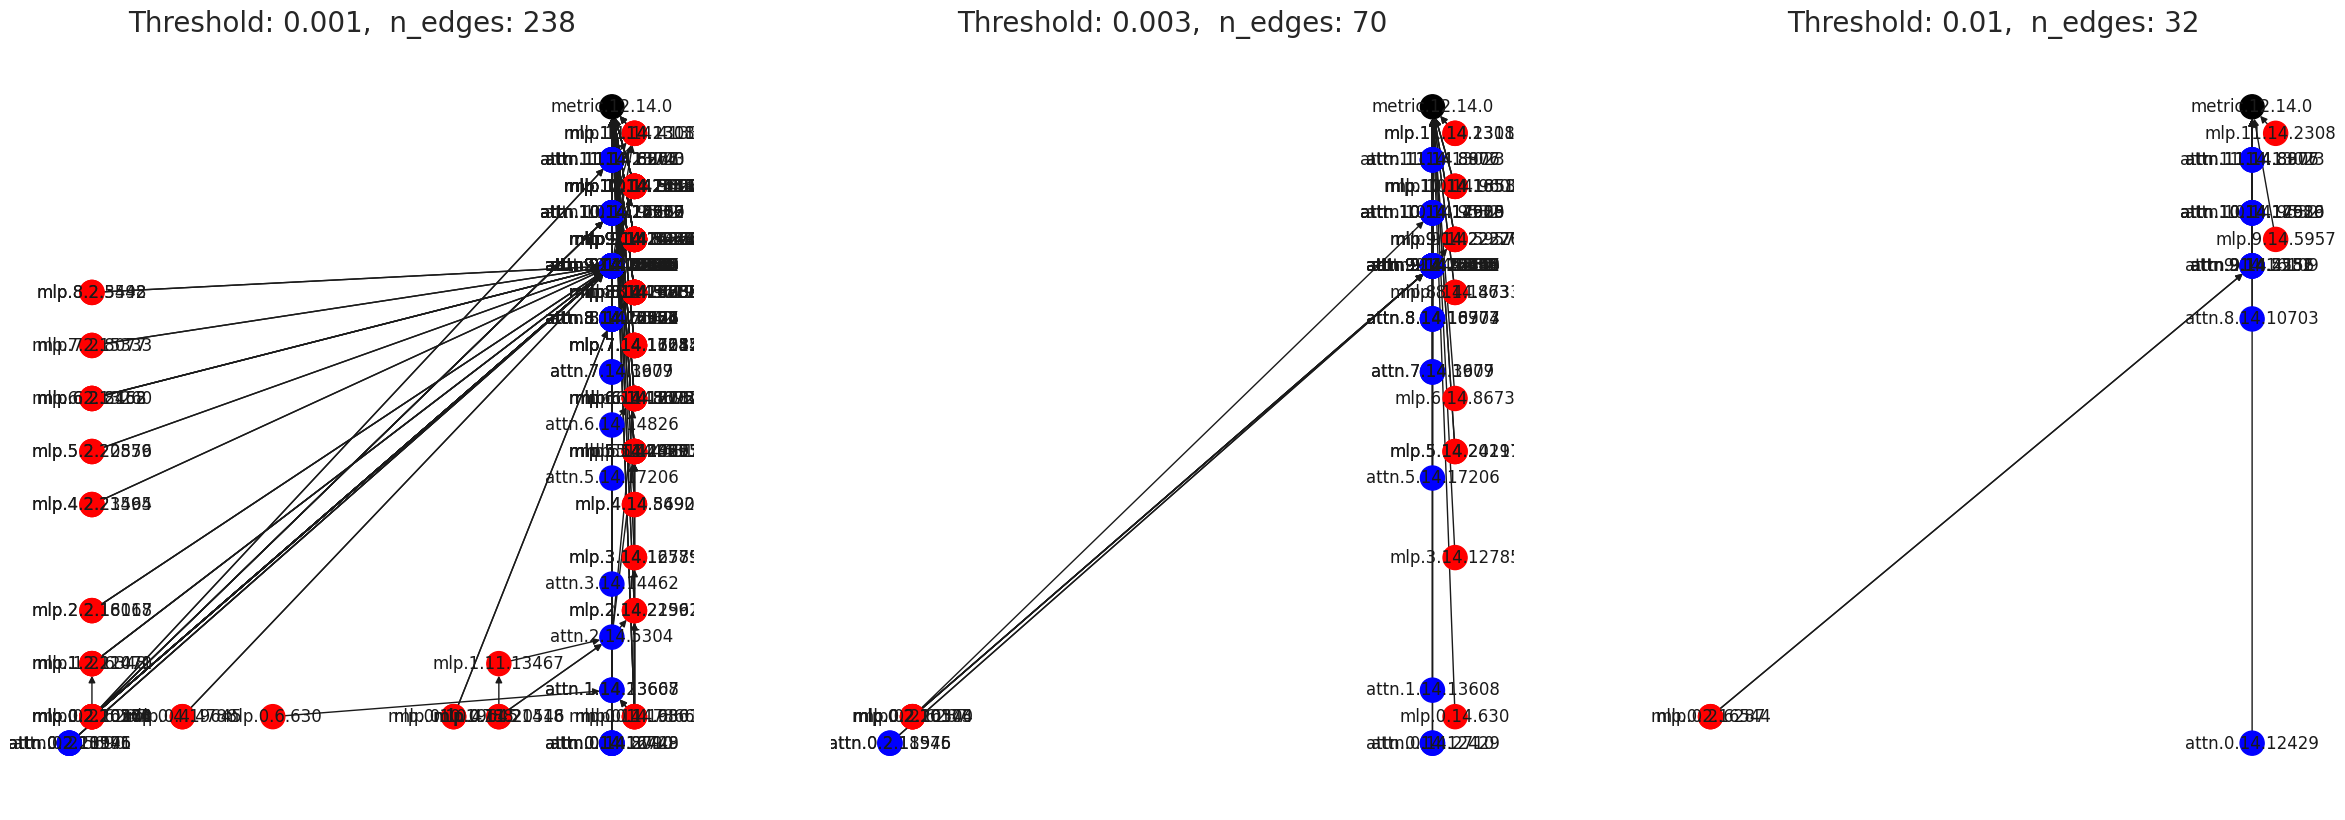

In [48]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
thresholds = [
    0.001,
    0.003,
    0.01,
    # 0.06
]

for ax, threshold in zip(axs, thresholds):
    with open(results_dir / f"leap-graph_threshold={threshold}.json") as f:
        graph = EAPGraph.from_json(json.load(f))

    n_edges = len(graph.get_edges())
    print(f"Threshold: {threshold}, n_edges: {n_edges}")
    ax.set_title(f"Threshold: {threshold},  n_edges: {n_edges}", fontsize=20)

    if n_edges > 1000:
        continue
    show_attrib_graph(graph, ax=ax)


fig.show()

# Plot Faithfulness Curve

<Axes: xlabel='num_nodes', ylabel='faithfulness'>

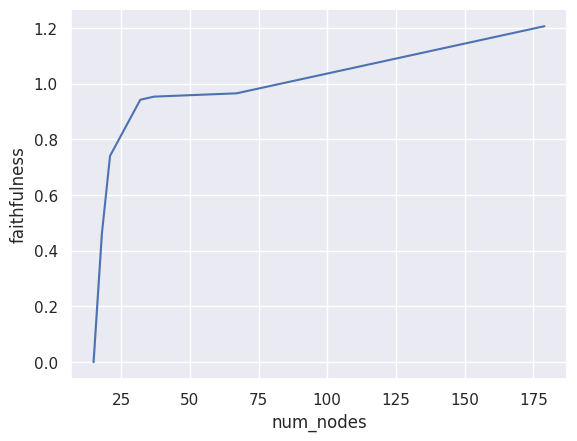

In [49]:
import seaborn as sns
sns.set_theme()

faithfulness_df = pd.read_csv(results_dir / "leap_experiment_results.csv")
sns.lineplot(data=faithfulness_df, x="num_nodes", y="faithfulness")